## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Dataset loading

In [2]:
# loading the data from csv file
ds=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop/dataset.csv")
ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# show rows and colums of dataset
ds.shape

(614, 13)

## Preprocessing

In [4]:
# statical visiulization
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,594.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.087542,342.00000,0.842199
std,6109.041673,2926.248369,85.674739,65.12041,0.364878
min,150.000000,0.000000,0.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,127.500000,360.00000,1.000000
75%,5795.000000,2297.250000,167.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# import random
# # Set the random seed
# random.seed(42)
# np.random.seed(42)

In [6]:
# features of datatpyes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         600 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         594 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
ds[ds.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [8]:
# ds.drop_duplicates()

In [9]:
# find missig values
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Drop the missig values in Dataset
# ds.dropna(inplace=True)
# # vds.dropna(inplace=True)

In [11]:
# fill the missig value By using mode
# ds["Credit_History"]=ds["Credit_History"].fillna(ds["Credit_History"].mean())
ds["Loan_Amount_Term"]=ds["Loan_Amount_Term"].fillna(ds["Loan_Amount_Term"].mean())
ds["LoanAmount"]=ds["LoanAmount"].fillna(ds["LoanAmount"].mean())
ds["Dependents"]=ds["Dependents"].fillna(ds["Dependents"].mode()[0])
ds["Gender"]=ds["Gender"].fillna(ds["Gender"].mode()[0])
ds["Married"]=ds["Married"].fillna(ds["Married"].mode()[0])
ds["Self_Employed"]=ds["Self_Employed"].fillna(ds["Self_Employed"][0])
ds.Credit_History.fillna(np.random.randint(0,2), inplace=True)



In [12]:
# find missig values
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# from random import randint
# df_over.LoanAmount.fillna(df_over.LoanAmount.median(),inplace=True)
# df_over.Loan_Amount_Term.fillna(df_over.Loan_Amount_Term.mean(),inplace=True)
# df_over.Credit_History.fillna(np.random.randint(0,2),inplace=True)
# df_over.Gender.fillna(np.random.randint(0,2),inplace=True)
# df_over.Education.fillna(np.random.randint(0,2),inplace=True)
# df_over.Married.fillna(np.random.randint(0,2),inplace=True)
# # ds.Dependents.fillna(ds.Dependents.median(),inplace=True)
# df_over.Self_Employed.fillna(np.random.randint(0,2),inplace=True)


In [14]:
# Dataset
ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Exploration 

Y    422
N    192
Name: Loan_Status, dtype: int64


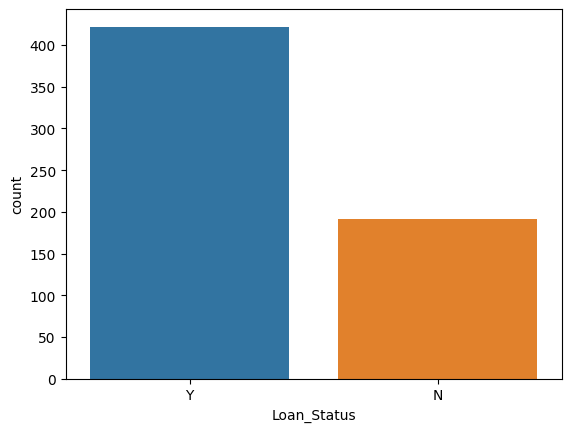

In [15]:
sns.countplot(x="Loan_Status", data=ds)
print(ds["Loan_Status"].value_counts())

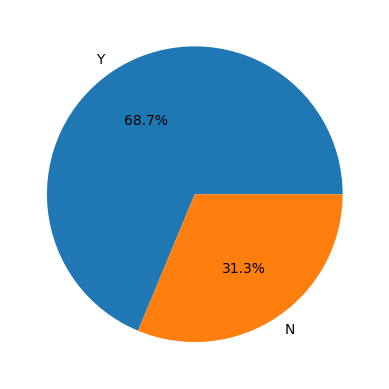

In [16]:
temp=ds["Loan_Status"].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


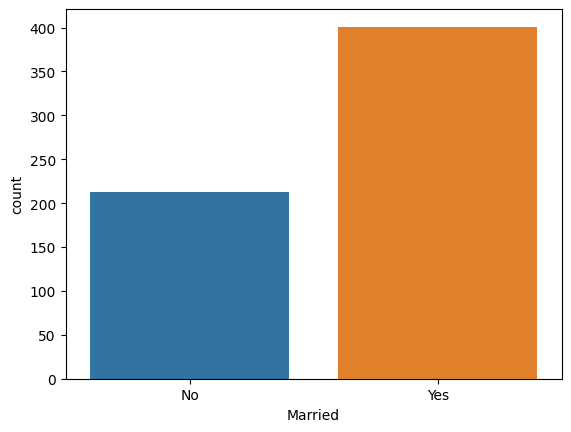

In [17]:
# Visulize different features of dataset
sns.countplot(x="Married",data=ds)
print(ds["Married"].value_counts())

In [18]:
# sns.countplot(x="Total_Income",hue="Loan_Status",data=ds)

No     532
Yes     82
Name: Self_Employed, dtype: int64


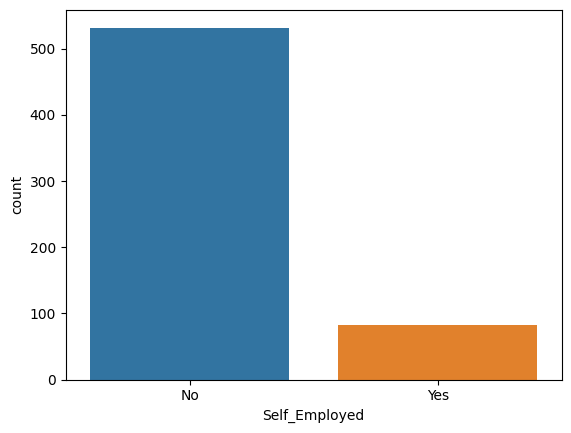

In [19]:
sns.countplot(x='Self_Employed',data=ds)
print(ds["Self_Employed"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


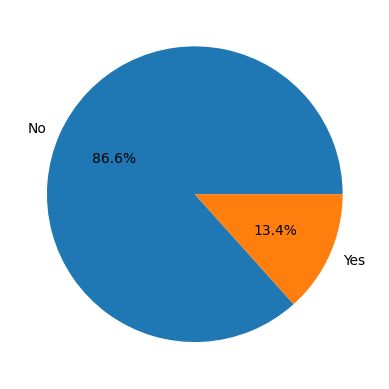

In [20]:
temp=ds["Self_Employed"].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
print(ds["Self_Employed"].value_counts())
plt.show()


Male      502
Female    112
Name: Gender, dtype: int64


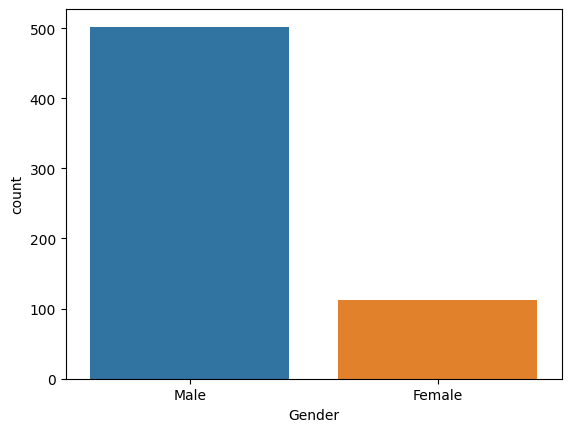

In [21]:
sns.countplot(x='Gender', data=ds)
print(ds["Gender"].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


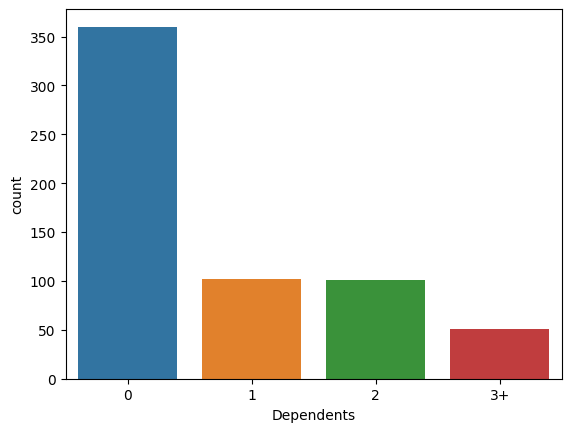

In [22]:
sns.countplot(x='Dependents', data=ds)
print(ds['Dependents'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


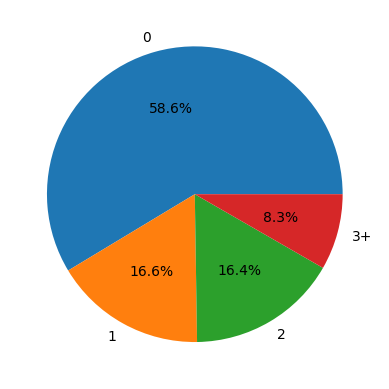

In [23]:
temp=ds["Dependents"].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
print(ds["Dependents"].value_counts())
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


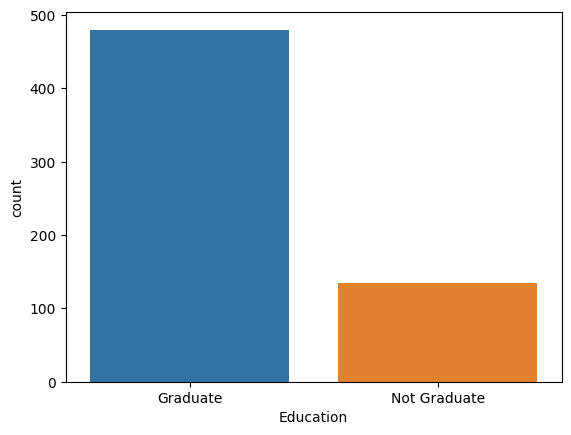

In [24]:
sns.countplot(x='Education', data=ds)
print(ds['Education'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


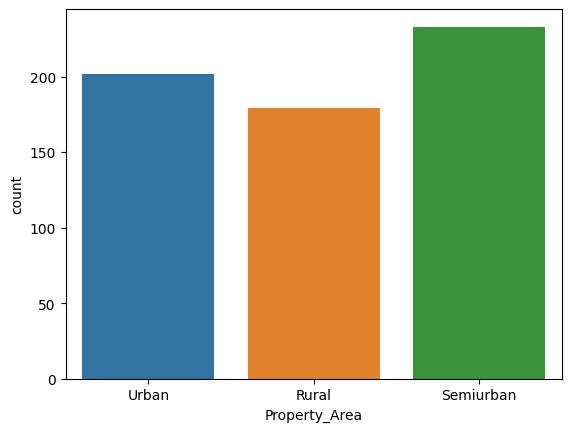

In [25]:
sns.countplot(x='Property_Area', data=ds)
print(ds['Property_Area'].value_counts())


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


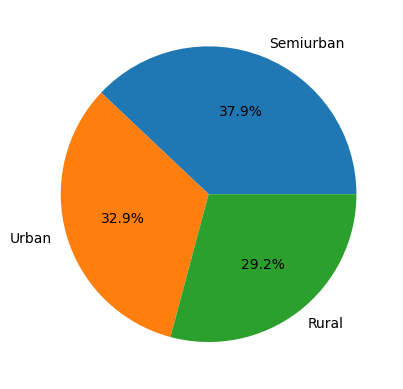

In [26]:
temp=ds["Property_Area"].value_counts()
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
print(ds["Property_Area"].value_counts())
plt.show()

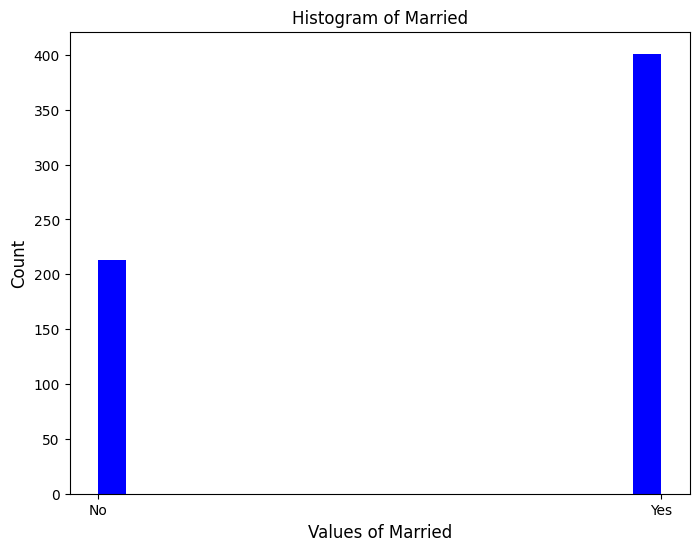

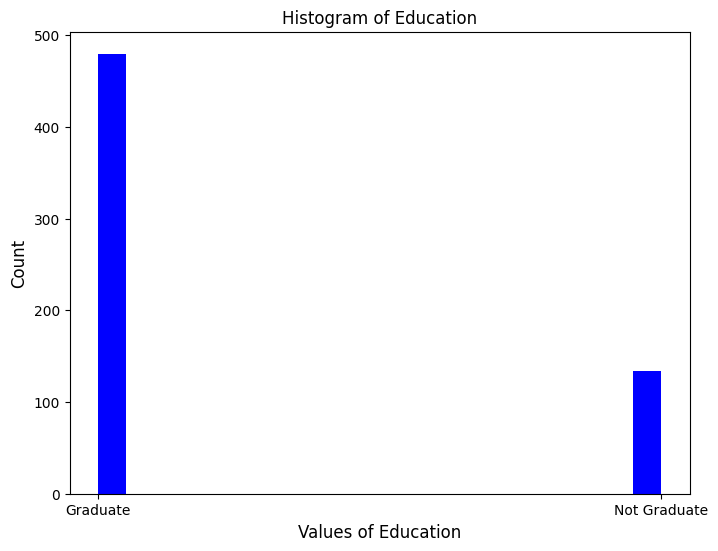

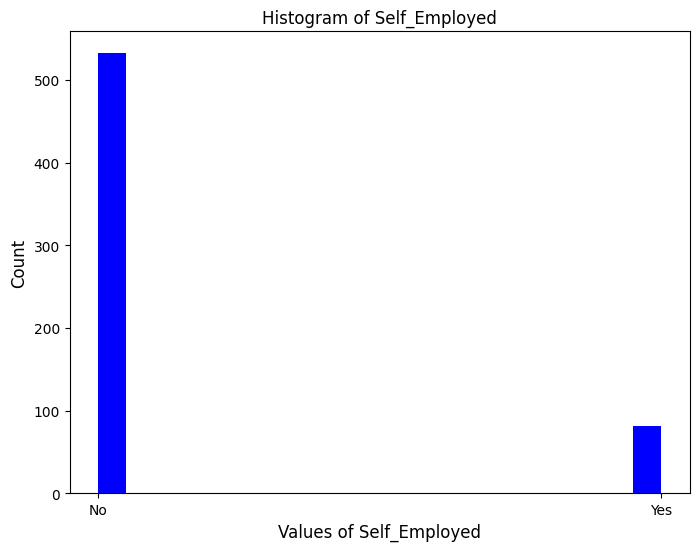

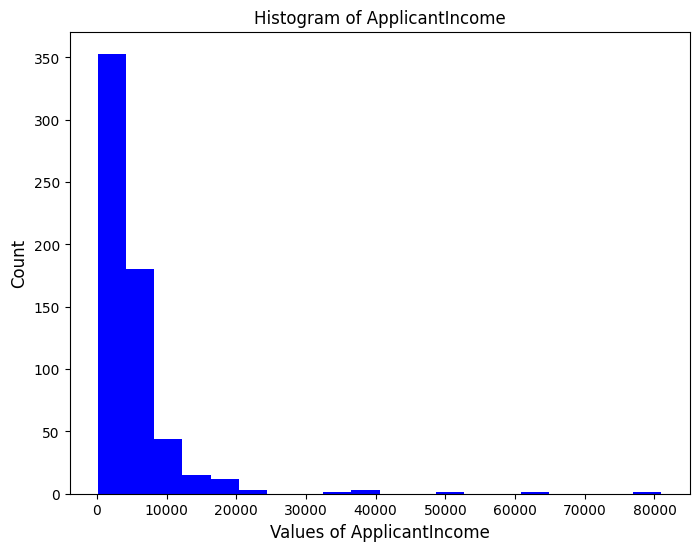

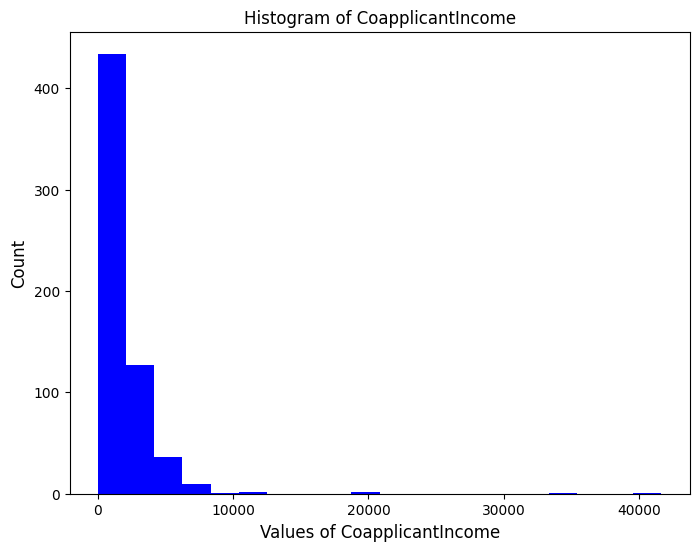

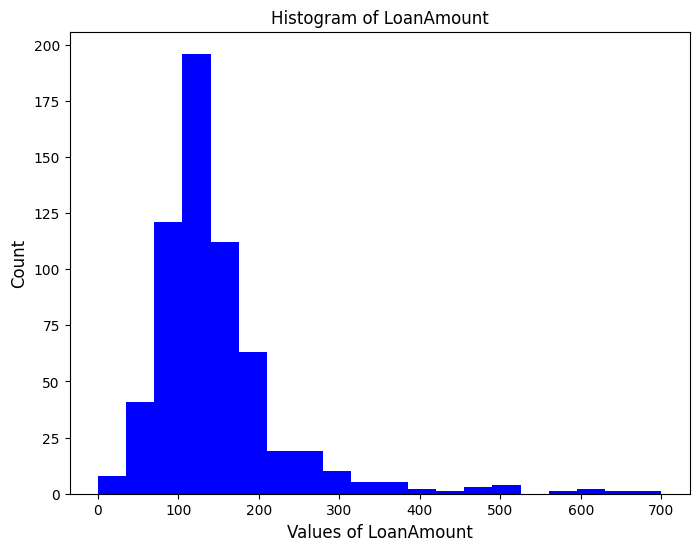

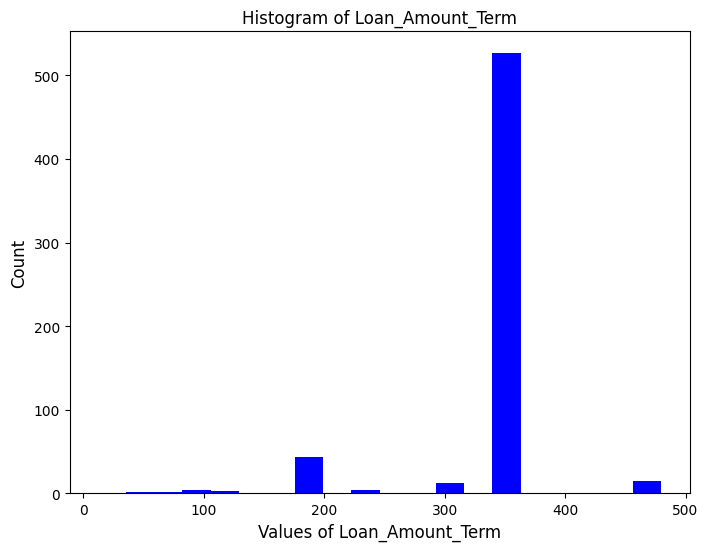

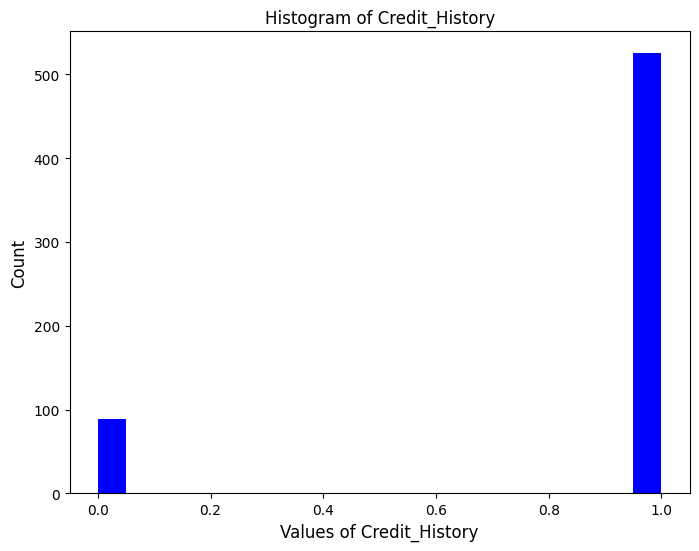

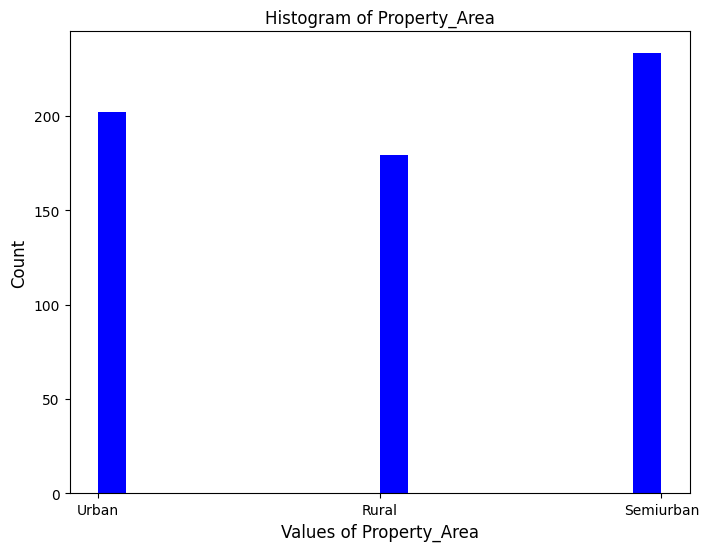

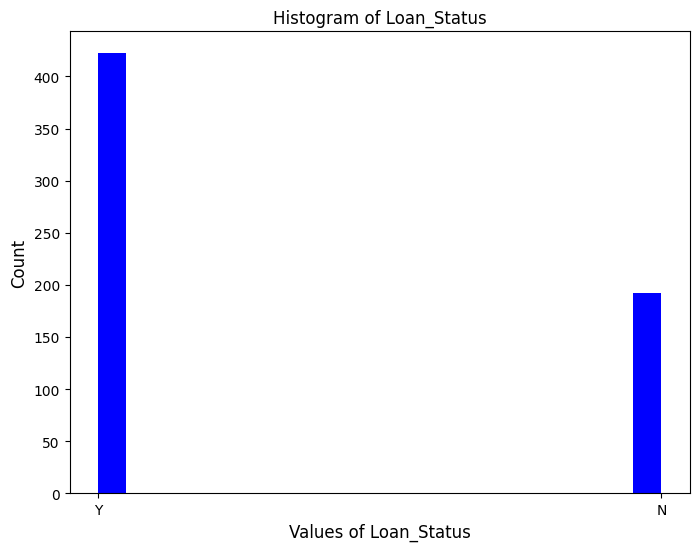

In [27]:
#Histogram

column_names = ["Married", 'Education','Self_Employed',
                'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	
                'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']

for column_name in column_names:
    feature = ds[column_name]
    
    plt.figure(figsize=(8, 6)) 
    
    plt.hist(feature, bins=20, color='blue')
    plt.title('Histogram of {}'.format(column_name))
    
    plt.xlabel('Values of {}'.format(column_name), fontsize=12)  
    plt.ylabel('Count', fontsize=12)  

    plt.tick_params(axis='both', labelsize=10)  
    
    plt.show()

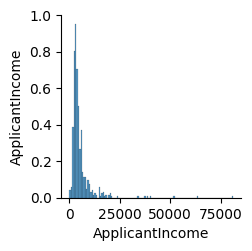

In [28]:
sns.pairplot(ds.iloc[:,1:7])

## Correlation

C:\Users\hp\AppData\Local\Temp\ipykernel_10080\596878165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(), annot=True)


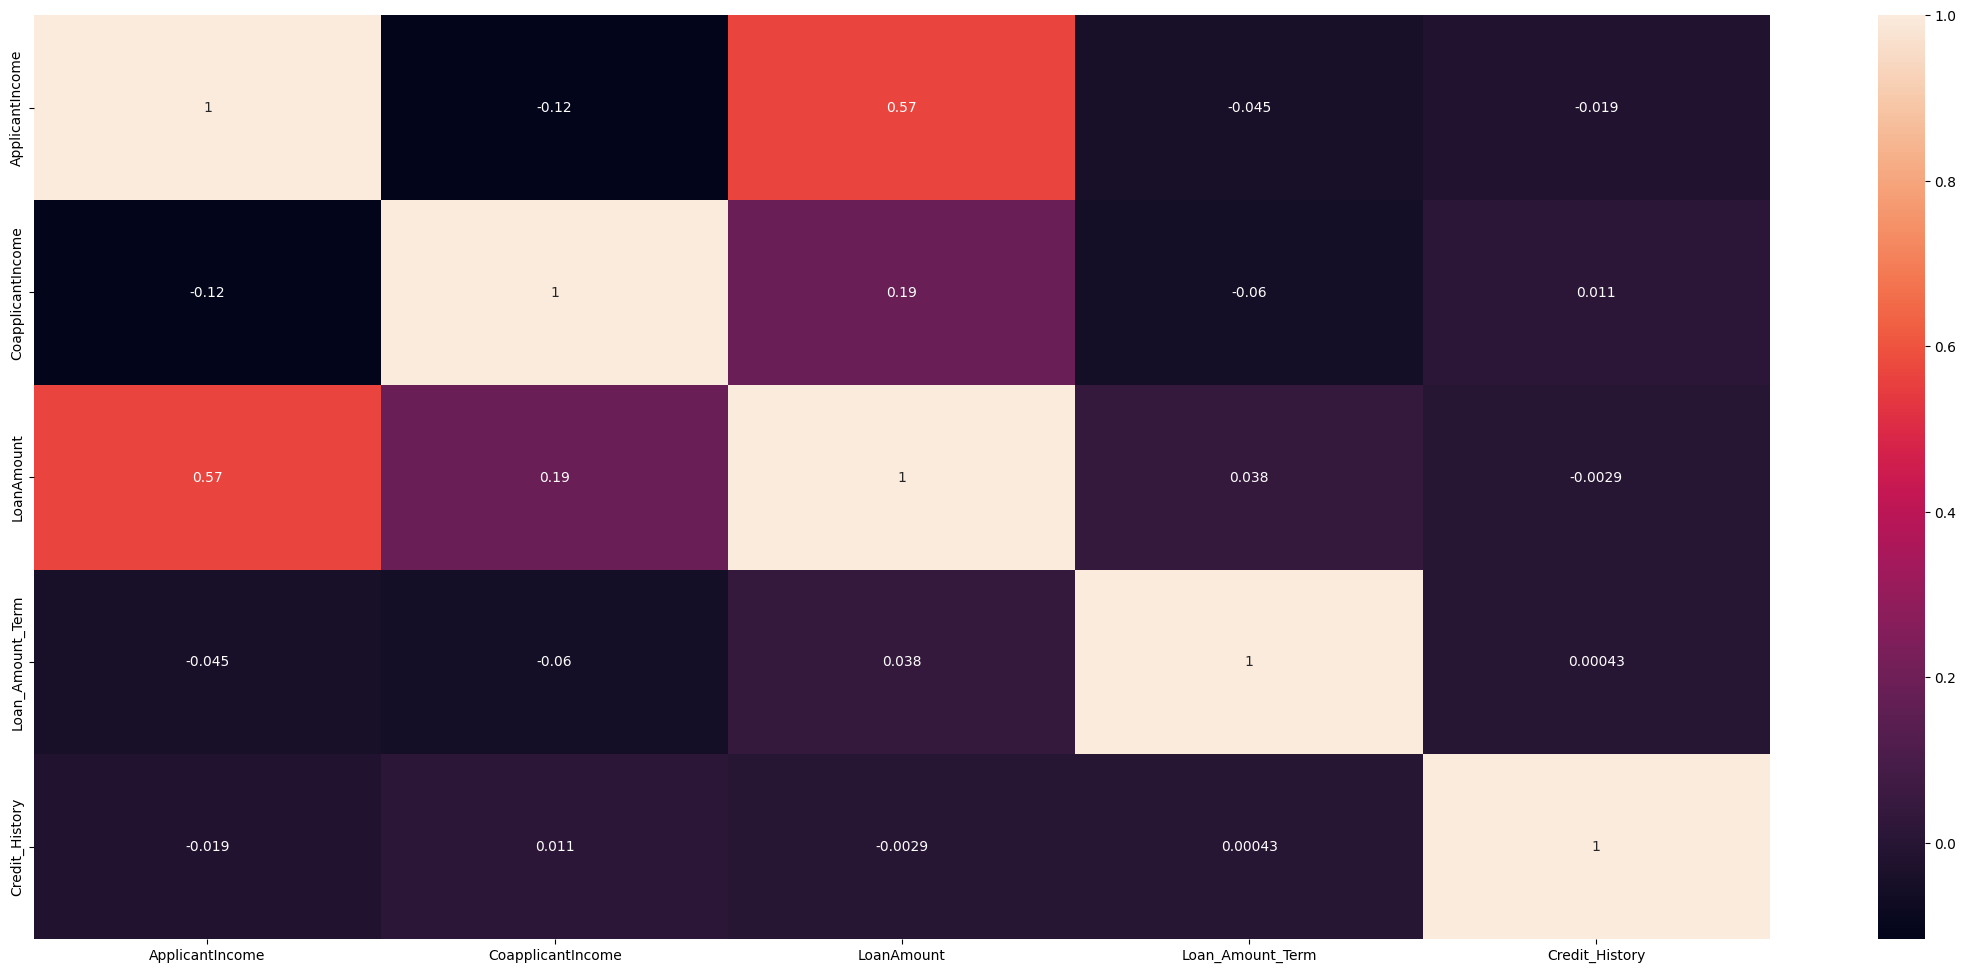

In [29]:
plt.figure(figsize=(28, 12))
sns.heatmap(ds.corr(), annot=True)
plt.show()

<Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

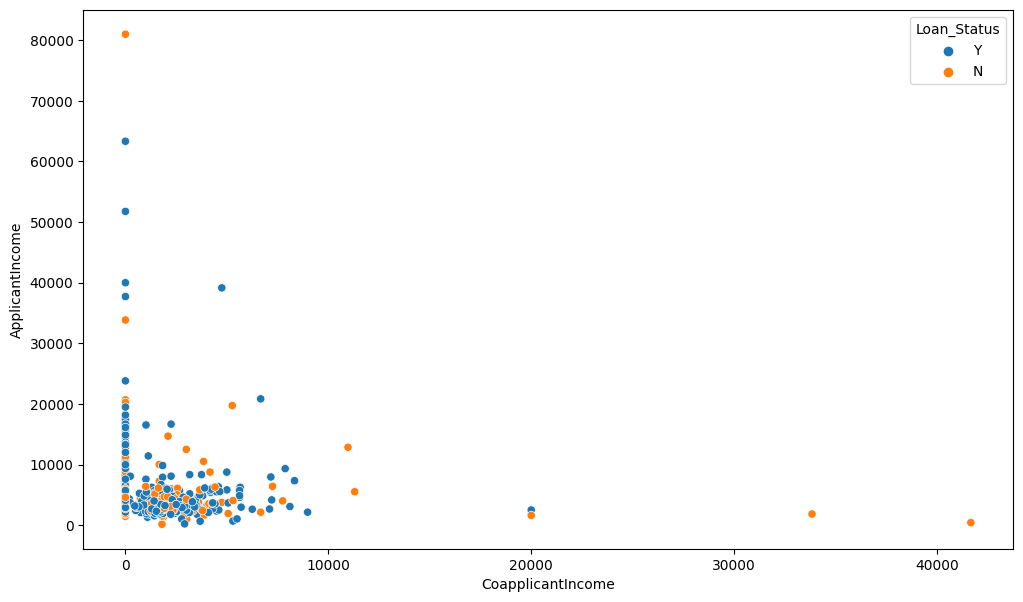

In [30]:
plt.figure(figsize=(12,7))
sns.scatterplot(data= ds,y='ApplicantIncome',x='CoapplicantIncome',hue='Loan_Status')

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

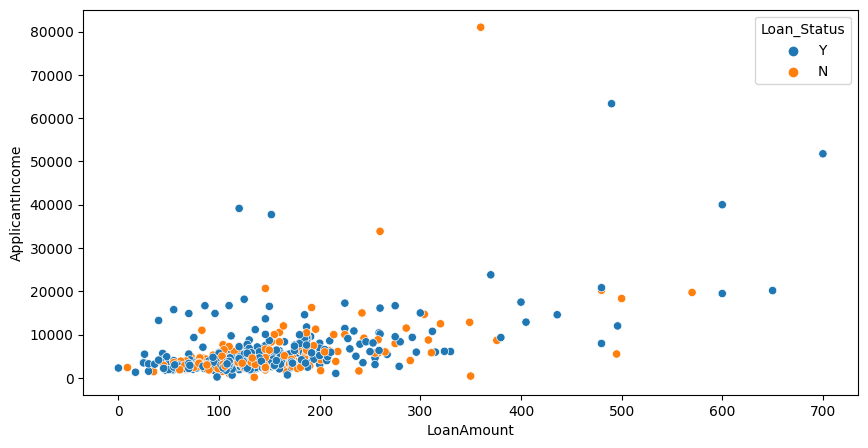

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=ds,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

In [32]:
# plt.figure(figsize=(12,7))
# sns.scatterplot(data=ds,y='CoapplicantIncome',x='LoanAmount',hue='Loan_Status')

## Label Encoder

In [33]:
# convert string or object to numeric values / label encodding
le=LabelEncoder()
ds["Loan_Status"]=le.fit_transform(ds["Loan_Status"])
ds["Gender"]=le.fit_transform(ds["Gender"])
ds["Married"]=le.fit_transform(ds["Married"])
ds["Education"]=le.fit_transform(ds["Education"])
ds["Self_Employed"]=le.fit_transform(ds["Self_Employed"])
ds["Property_Area"]=le.fit_transform(ds["Property_Area"])
ds = ds.replace(to_replace="3+",value=4)

In [34]:
# le=LabelEncoder()
# datatype=ds.dtypes==object
# columns=ds.columns[datatype].tolist()
# ds[columns]=ds[columns].apply(lambda val: le.fit_transform(val))

In [35]:
# le=LabelEncoder()
# ds.Education=ds.Education.map({'Graduate':1,'Not Graduate':0})
# ds.Gender=ds.Gender.map({'Male':1,'Female':0})
# ds.Property_Area=ds.Property_Area.map({'Urban':1,'Semiurban':2,'Rural':0})
# ds.Married=ds.Married.map({'Yes':1,'No':0})
# ds.Self_Employed=ds.Self_Employed.map({'Yes':1,'No':0})
# ds["Dependents"]=le.fit_transform(ds["Dependents"])
# ds = ds.replace(to_replace="3+",value=4)
# ds.sample(5)

In [36]:
ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


## Data Cleaning


In [37]:
# for accurate predicaton creating new feature
ds["Total_Income"]=ds["ApplicantIncome"]+ds["CoapplicantIncome"]

In [38]:
# Drop unnecessary coloums
ds=ds.drop(columns=["Loan_ID","Gender"], axis=1)


In [39]:
# df_over.Total_Income = df_over.Total_Income/100
# ds.Loan_Amount_Term	 = ds.Loan_Amount_Term	/10

In [40]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(ds)

scaled_df = pd.DataFrame(scaled_data, columns=ds.columns)

pd.DataFrame(scaled_df)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.142857,0.743590,1.0,1.0,1.0,0.055394
1,1.0,0.25,0.0,0.0,0.054830,0.036192,0.182857,0.743590,1.0,0.0,0.0,0.058435
2,1.0,0.00,0.0,1.0,0.035250,0.000000,0.094286,0.743590,1.0,1.0,1.0,0.019583
3,1.0,0.00,1.0,0.0,0.030093,0.056592,0.171429,0.743590,1.0,1.0,1.0,0.043980
4,0.0,0.00,0.0,0.0,0.072356,0.000000,0.201429,0.743590,1.0,1.0,1.0,0.057292
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.00,0.0,0.0,0.034014,0.000000,0.101429,0.743590,1.0,0.0,1.0,0.018326
610,1.0,1.00,0.0,0.0,0.048930,0.000000,0.057143,0.358974,1.0,0.0,1.0,0.033485
611,1.0,0.25,0.0,0.0,0.097984,0.005760,0.361429,0.743590,1.0,1.0,1.0,0.086352
612,1.0,0.50,0.0,0.0,0.091936,0.000000,0.267143,0.743590,1.0,1.0,1.0,0.077189


In [41]:
ds.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,0,5849,0.0,100.0,360.0,1.0,2,1,5849.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


## Data Modeling

In [42]:
# Selecting input and output variables
X=ds.drop(columns=["Loan_Status"], axis=1)
y =ds["Loan_Status"]

In [43]:
X.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,0,0,0,5849,0.0,100.0,360.0,1.0,2,5849.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0


In [44]:
# from imblearn.over_sampling import SMOTE
# # Apply oversampling using SMOTE
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)

# # Check the balanced dataset
# print("Original dataset shape:", X.shape, y.shape)
# print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)


In [45]:
# Apply undersampling and oversampling

from imblearn.combine import SMOTEENN

# Apply undersampling and oversampling using SMOTEENN
sme = SMOTEENN(random_state=42)
X_balanced, y_balanced = sme.fit_resample(X, y)
# Check the balanced dataset
print("Original dataset shape:", X.shape, y.shape)
print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)

Original dataset shape: (614, 11) (614,)
Balanced dataset shape: (269, 11) (269,)


In [46]:
# Splitting the data for Traning and Testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.23,random_state=42)


In [47]:
y_train.value_counts()

0    108
1     99
Name: Loan_Status, dtype: int64

In [48]:
# print(X.shape,X_train.shape, X_test.shape)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. DecisionTreeClassifier

In [50]:
model1=DecisionTreeClassifier(max_depth=6,min_samples_split=5)
model1.fit(X_train,y_train)
y_test_pred1 = model1.predict(X_test)
y_train_pred1 = model1.predict(X_train)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
prec1 = precision_score(y_test, y_test_pred1)
rec1 = recall_score(y_test, y_test_pred1)
f1_1 = f1_score(y_test, y_test_pred1)

print(" Accuracy:", test_accuracy1*100)
print("Training Accuracy:", train_accuracy1*100)
print("Precision:", prec1*100)
print("Recall:", rec1*100)
print("F1 Score:", f1_1*100)

 Accuracy: 87.09677419354838
Training Accuracy: 92.7536231884058
Precision: 81.81818181818183
Recall: 93.10344827586206
F1 Score: 87.09677419354838


In [51]:
CM1 = confusion_matrix(y_test, y_test_pred1)

Text(50.722222222222214, 0.5, 'Actual')

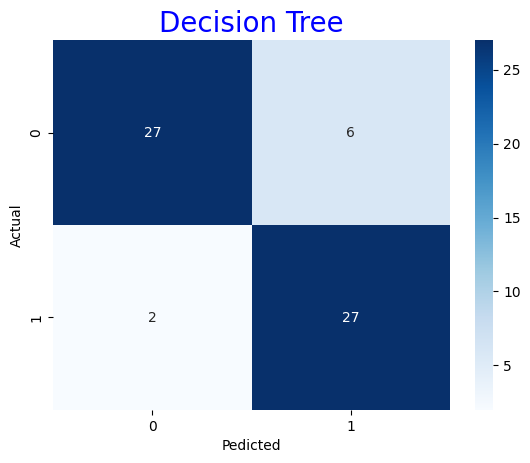

In [52]:
sns.heatmap(CM1, annot=True, cmap='Blues')
plt.title('Decision Tree', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 2. RandomForestClassifier

In [53]:
model2=RandomForestClassifier(max_depth=4)
model2.fit(X_train,y_train)
y_test_pred2 = model2.predict(X_test)
y_train_pred2 = model2.predict(X_train)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
prec2 = precision_score(y_test, y_test_pred2)
rec2= recall_score(y_test, y_test_pred2)
f1_2 = f1_score(y_test, y_test_pred2)

print(" Accuracy:", test_accuracy2*100)
print("Training Accuracy:", train_accuracy2*100)
print("Precision:", prec2*100)
print("Recall:", rec2*100)
print("F1 Score:", f1_2*100)

 Accuracy: 80.64516129032258
Training Accuracy: 92.7536231884058
Precision: 71.7948717948718
Recall: 96.55172413793103
F1 Score: 82.35294117647058


In [54]:
CM2 = confusion_matrix(y_test, y_test_pred2)

Text(50.722222222222214, 0.5, 'Actual')

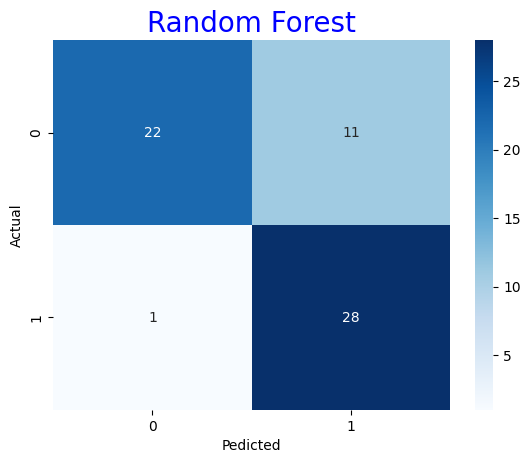

In [55]:
sns.heatmap(CM2, annot=True, cmap='Blues')
plt.title('Random Forest', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 3. Support Vector Machine

In [56]:
model3=SVC()
model3.fit(X_train,y_train)
y_test_pred3 = model3.predict(X_test)
y_train_pred3 = model3.predict(X_train)
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
train_accuracy3 = accuracy_score(y_train, y_train_pred3)
prec3 = precision_score(y_test, y_test_pred3)
rec3= recall_score(y_test, y_test_pred3)
f1_3 = f1_score(y_test, y_test_pred3)

print(" Accuracy:", test_accuracy3*100)
print("Training Accuracy:", train_accuracy3*100)
print("Precision:", prec3*100)
print("Recall:", rec3*100)
print("F1 Score:", f1_3*100)

 Accuracy: 50.0
Training Accuracy: 61.83574879227053
Precision: 46.666666666666664
Recall: 48.275862068965516
F1 Score: 47.457627118644076


In [57]:
CM3 = confusion_matrix(y_test, y_test_pred3)

Text(50.722222222222214, 0.5, 'Actual')

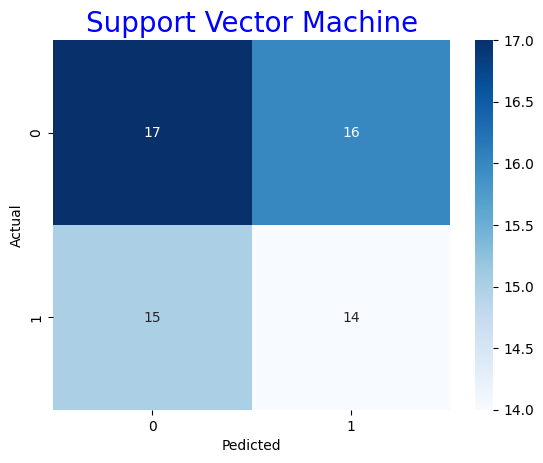

In [58]:
sns.heatmap(CM3, annot=True, cmap='Blues')
plt.title('Support Vector Machine', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 4. LogisticRegression

In [59]:
model4=LogisticRegression()
model4.fit(X_train,y_train)
y_test_pred4 = model4.predict(X_test)
y_train_pred4 = model4.predict(X_train)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
prec4 = precision_score(y_test, y_test_pred4)
rec4 = recall_score(y_test, y_test_pred4)
f1_4 = f1_score(y_test, y_test_pred4)

print(" Accuracy:", test_accuracy4*100)
print("Training Accuracy:", train_accuracy4*100)
print("Precision:", prec4*100)
print("Recall:", rec4*100)
print("F1 Score:", f1_4*100)

 Accuracy: 67.74193548387096
Training Accuracy: 81.64251207729468
Precision: 62.857142857142854
Recall: 75.86206896551724
F1 Score: 68.75


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
CM4 = confusion_matrix(y_test, y_test_pred4)

Text(50.722222222222214, 0.5, 'Actual')

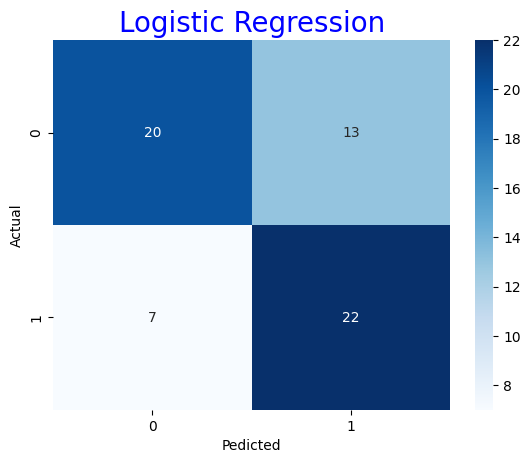

In [61]:
sns.heatmap(CM4, annot=True, cmap='Blues')
plt.title('Logistic Regression', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 5. GaussianNB

In [62]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_test_pred5 = model5.predict(X_test)
y_train_pred5 = model5.predict(X_train)
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
train_accuracy5 = accuracy_score(y_train, y_train_pred5)
prec5 = precision_score(y_test, y_test_pred5)
rec5 = recall_score(y_test, y_test_pred5)
f1_5 = f1_score(y_test, y_test_pred5)

print(" Accuracy:", test_accuracy5*100)
print("Training Accuracy:", train_accuracy5*100)
print("Precision:", prec5*100)
print("Recall:", rec5*100)
print("F1 Score:", f1_5*100)

 Accuracy: 72.58064516129032
Training Accuracy: 78.74396135265701
Precision: 63.63636363636363
Recall: 96.55172413793103
F1 Score: 76.71232876712328


In [63]:
CM5 = confusion_matrix(y_test, y_test_pred5)

Text(50.722222222222214, 0.5, 'Actual')

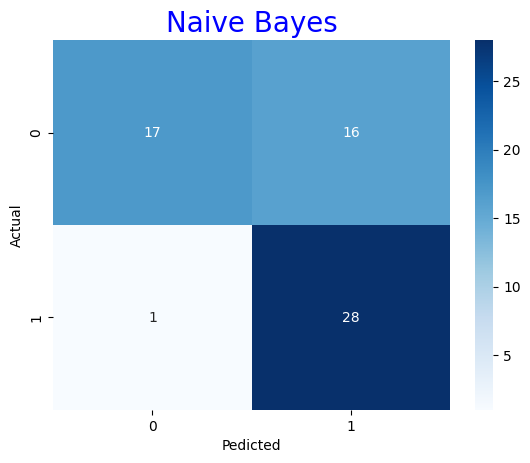

In [64]:
sns.heatmap(CM5, annot=True, cmap='Blues')
plt.title('Naive Bayes', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 6. KNeighborsClassifier

In [65]:
model6=KNeighborsClassifier(n_neighbors=3) 
model6.fit (X_train, y_train)
y_test_pred6 = model6.predict(X_test)
y_train_pred6 = model6.predict(X_train)
test_accuracy6 = accuracy_score(y_test, y_test_pred6)
train_accuracy6 = accuracy_score(y_train, y_train_pred6)
prec6 = precision_score(y_test, y_test_pred6)
rec6 = recall_score(y_test, y_test_pred6)
f1_6 = f1_score(y_test, y_test_pred6)

print(" Accuracy:", test_accuracy6*100)
print("Training Accuracy:", train_accuracy6*100)
print("Precision:", prec6*100)
print("Recall:", rec6*100)
print("F1 Score:", f1_6*100)

 Accuracy: 96.7741935483871
Training Accuracy: 98.06763285024155
Precision: 96.55172413793103
Recall: 96.55172413793103
F1 Score: 96.55172413793103


In [66]:
CM6 = confusion_matrix(y_test, y_test_pred6)

Text(50.722222222222214, 0.5, 'Actual')

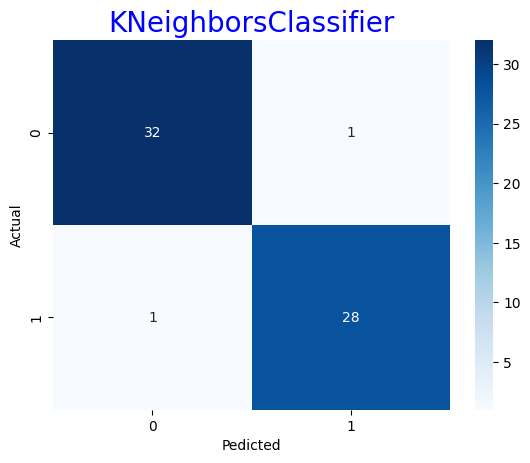

In [67]:
sns.heatmap(CM6, annot=True, cmap='Blues')
plt.title('KNeighborsClassifier', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

## 7. GradientBoostingClassifier

In [68]:
model7=GradientBoostingClassifier(learning_rate=0.5)
model7.fit(X_train,y_train)
y_test_pred7 = model7.predict(X_test)
y_train_pred7= model7.predict(X_train)
test_accuracy7 = accuracy_score(y_test, y_test_pred7)
train_accuracy7= accuracy_score(y_train, y_train_pred7)
prec7 = precision_score(y_test, y_test_pred7)
rec7 = recall_score(y_test, y_test_pred7)
f1_7 = f1_score(y_test, y_test_pred7)

print("Testing Accuracy:", test_accuracy7*100)
print("Training Accuracy:", train_accuracy7*100)
print("Precision:", prec7*100)
print("Recall:", rec7*100)
print("F1 Score:", f1_7*100)

Testing Accuracy: 88.70967741935483
Training Accuracy: 100.0
Precision: 84.375
Recall: 93.10344827586206
F1 Score: 88.52459016393443


Text(50.722222222222214, 0.5, 'Actual')

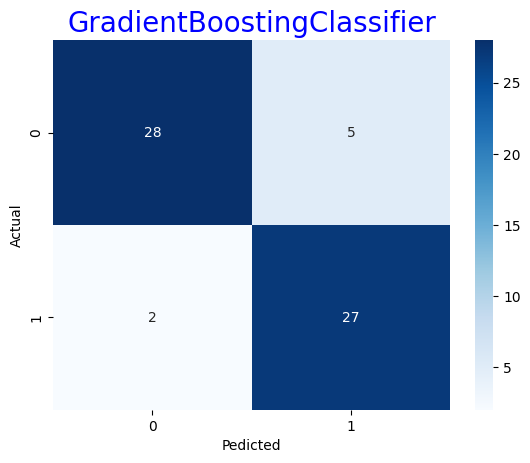

In [69]:
CM7 = confusion_matrix(y_test, y_test_pred7)
sns.heatmap(CM7, annot=True, cmap='Blues')
plt.title('GradientBoostingClassifier', fontsize= 20, color = 'Blue')
plt.xlabel('Pedicted')
plt.ylabel('Actual')

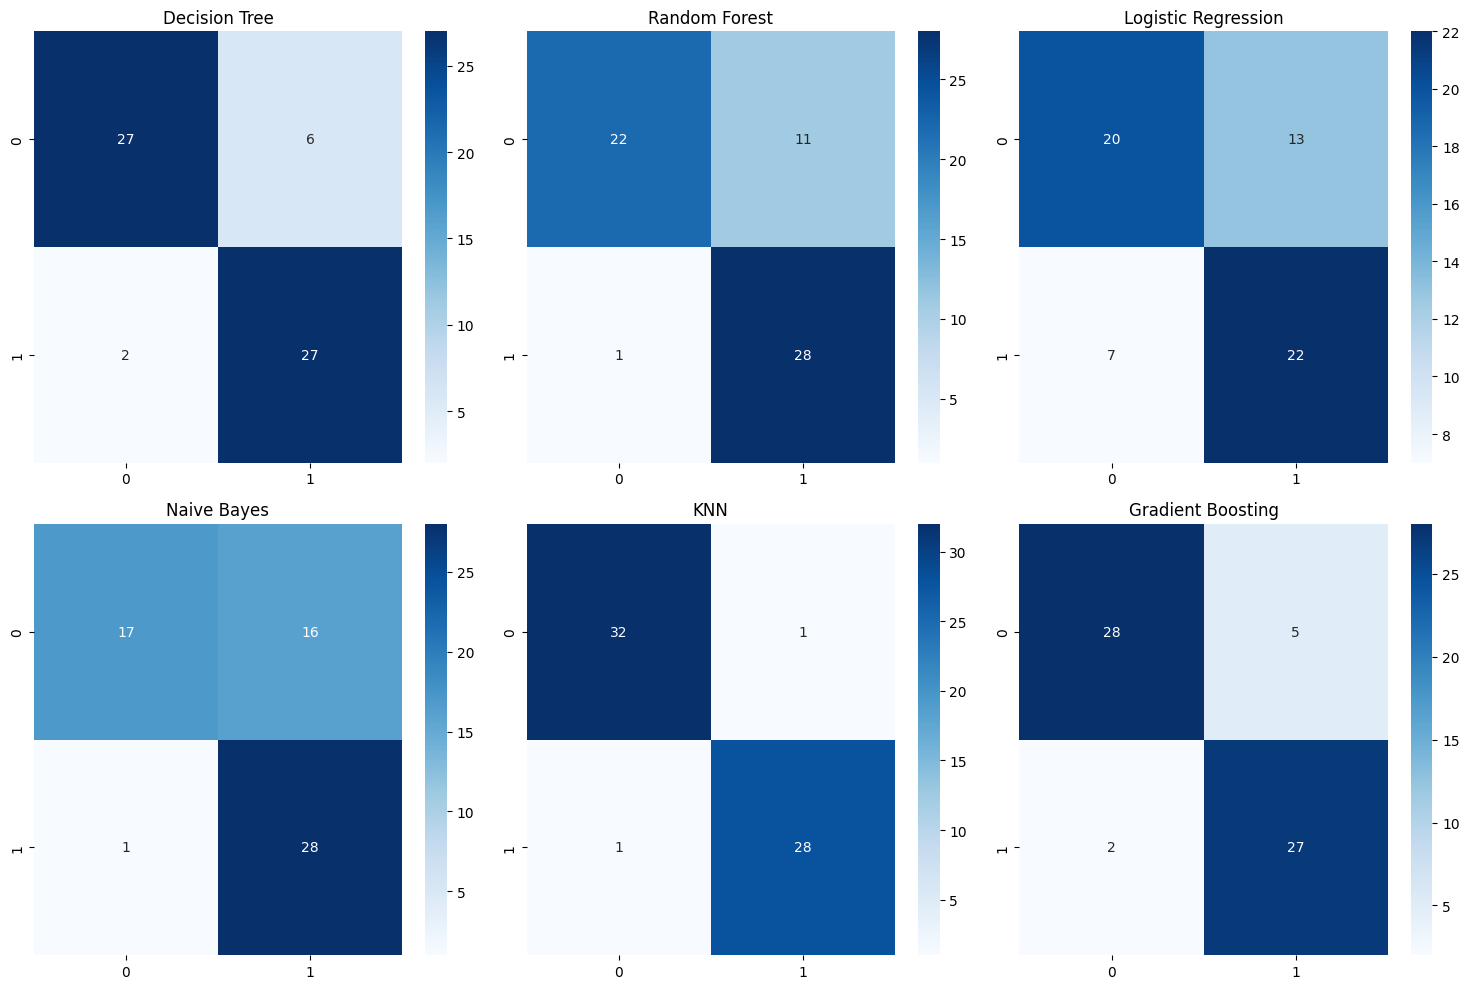

In [70]:
# Comparision of confusion confusion_matrix

models = [
    ("Decision Tree", model1),
    ("Random Forest", model2),
    ("Logistic Regression", model4),
    ("Naive Bayes", model5),
    ("KNN", model6),
    ("Gradient Boosting", model7)
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (model_name, model) in enumerate(models):
    row = i // 3
    col = i % 3

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", ax=axs[row, col])
    axs[row, col].set_title(model_name)

plt.tight_layout()
plt.show()

In [71]:
# Comparison of Accuracy Score, Precision Score, F1 Score and Recall Score

table = pd.DataFrame({
    'Algorithms': ['Decision Tree','Random Forest','Support Vector Machine','Logistic Regression','Naive Bayes','K Neighbor','Gradient Bossting'],
    'Testing Accuracy':[test_accuracy1*100,test_accuracy2*100,test_accuracy3*100,test_accuracy4*100,test_accuracy5*100,test_accuracy6*100,test_accuracy7*100],
    'Training Accuracy':[train_accuracy1*100,train_accuracy2*100,train_accuracy3*100,train_accuracy4*100,train_accuracy5*100,train_accuracy6*100,train_accuracy7*100],
    'Precision Score':[prec1*100,prec2*100,prec3*100,prec4*100,prec5*100,prec6*100,prec7*100],
    'Recall Score':[rec1*100,rec2*100,rec3*100,rec4*100,rec5*100,rec6*100,rec7*100],
    'F1 Score':[f1_1*100,f1_2*100,f1_3*100,f1_4*100,f1_5*100,f1_6*100,f1_7*100]
    })
table

,Algorithms,Testing Accuracy,Training Accuracy,Precision Score,Recall Score,F1 Score
0,Decision Tree,87.096774,92.753623,81.818182,93.103448,87.096774
1,Random Forest,80.645161,92.753623,71.794872,96.551724,82.352941
2,Support Vector Machine,50.000000,61.835749,46.666667,48.275862,47.457627
3,Logistic Regression,67.741935,81.642512,62.857143,75.862069,68.750000
4,Naive Bayes,72.580645,78.743961,63.636364,96.551724,76.712329
5,K Neighbor,96.774194,98.067633,96.551724,96.551724,96.551724
6,Gradient Bossting,88.709677,100.000000,84.375000,93.103448,88.524590


In [72]:
import pickle 
pickle.dump(model6,open('model.pkl','wb'))